In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

# MLP (Multilayer Perceptron)

In [2]:
from utils.dataset_loader import FashionMNIST, CIFAR10, split_large_dataset

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
seed_value = 21
batch_size=32

In [5]:
f_dataset = FashionMNIST(batch_size=batch_size, seed=seed_value)

train_ds = f_dataset.get_dataloader(train=True)
test_ds = f_dataset.get_dataloader(train=False)

for imgs, labels in train_ds.take(1):
    print("image batch shape: ", imgs.shape)
    print("X type: ", imgs.dtype)
    print("Label batch: ", labels.numpy())
    print("labels: ", f_dataset.text_labels(labels))


image batch shape:  (32, 28, 28, 1)
X type:  <dtype: 'float32'>
Label batch:  [9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4 3 1 4 8 4 3 0 2 4 4 5 3]
labels:  ['Ankle boot', 'Top/T-shirt', 'Top/T-shirt', 'Dress', 'Top/T-shirt', 'Pullover', 'Sneaker', 'Pullover', 'Sandal', 'Sandal', 'Top/T-shirt', 'Ankle boot', 'Sandal', 'Sandal', 'Sneaker', 'Ankle boot', 'Trouser', 'Top/T-shirt', 'Shirt', 'Coat', 'Dress', 'Trouser', 'Coat', 'Bag', 'Coat', 'Dress', 'Top/T-shirt', 'Pullover', 'Coat', 'Coat', 'Sandal', 'Dress']


In [6]:
c_dataset = CIFAR10(batch_size=batch_size, seed=seed_value)

train_ds_10 = c_dataset.get_dataloader(train=True)
test_ds_10 = c_dataset.get_dataloader(train=False)

for imgs2, labels2 in train_ds_10.take(1):
    print("image batch shape: ", imgs2.shape)
    print("X type: ", imgs2.dtype)
    print("Label batch: ", labels2.numpy())
    print("labels: ", c_dataset.text_labels(labels2))


image batch shape:  (32, 28, 28, 3)
X type:  <dtype: 'float32'>
Label batch:  [6 9 9 4 1 1 2 7 8 3 4 7 7 2 9 9 9 3 2 6 4 3 6 6 2 6 3 5 4 0 0 9]
labels:  ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat', 'deer', 'horse', 'horse', 'bird', 'truck', 'truck', 'truck', 'cat', 'bird', 'frog', 'deer', 'cat', 'frog', 'frog', 'bird', 'frog', 'cat', 'dog', 'deer', 'airplane', 'airplane', 'truck']


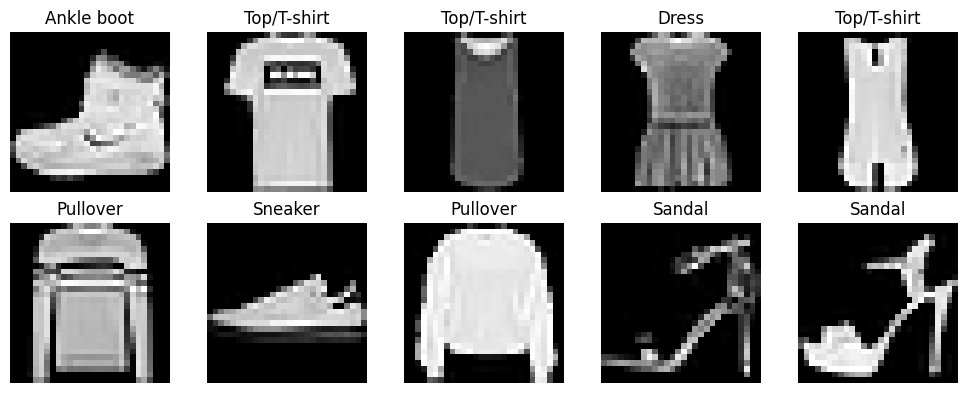

In [7]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(imgs[i].numpy().squeeze(), cmap='gray')
    plt.title(f_dataset.text_labels([labels[i]])[0])
    plt.axis('off')
plt.tight_layout()
plt.show()

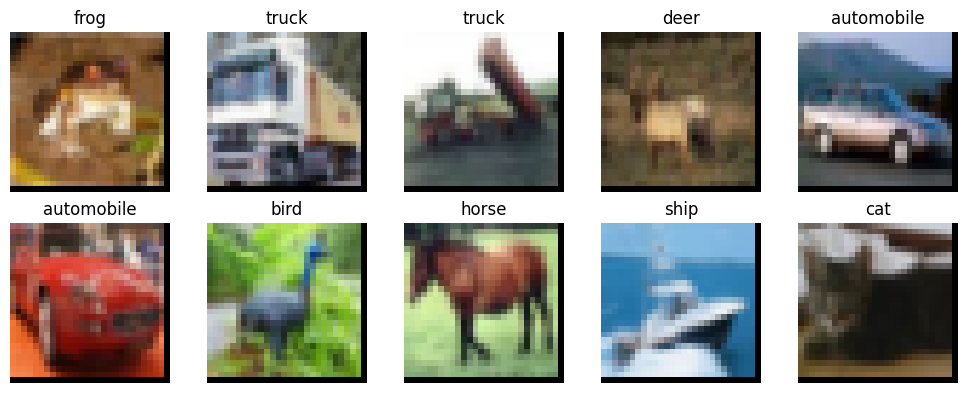

In [8]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(imgs2[i].numpy().squeeze(), cmap='gray')
    plt.title(c_dataset.text_labels([labels2[i]])[0])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
# Get input shape dynamically from dataset
for X, y in train_ds.take(1):
    input_shape = X.shape[1:]  # (28, 28, 1) for FashionMNIST
    print("Input shape:", input_shape)


Input shape: (28, 28, 1)


## Training the model on Fashion-MNIST

### Single hidden layer

Start with MLP with a single hidden layer and 256 hidden units. It's convenient for the number of hidden units to be divisible by larger powers of 2, for memory allocation reasons.

In [10]:
from utils.model_loader import MLPscratch

In [11]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    min_delta=1e-5,
    restore_best_weights=True,
    verbose=1
)


In [12]:
num_classes = 10

mlp_model = MLPscratch(input_shape=input_shape, num_classes=num_classes, num_hiddens=256, seed_value=seed_value)
mlp_model.MLP(lr=5e-4)

train_data, val_data = split_large_dataset(train_ds, batch_size=batch_size, total_size=len(f_dataset.train_ds[0]))

history = mlp_model.mlp_model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[early_stop]
)


Epoch 1/50
   1491/Unknown 4s 2ms/step - accuracy: 0.7644 - loss: 0.6783

e:\intro-to-ml-basics\basics-ml\Lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7648 - loss: 0.6773 - val_accuracy: 0.8564 - val_loss: 0.4061
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8568 - loss: 0.4024 - val_accuracy: 0.8690 - val_loss: 0.3670
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8713 - loss: 0.3532 - val_accuracy: 0.8712 - val_loss: 0.3519
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8819 - loss: 0.3229 - val_accuracy: 0.8725 - val_loss: 0.3445
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8884 - loss: 0.3007 - val_accuracy: 0.8752 - val_loss: 0.3385
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8962 - loss: 0.2829 - val_accuracy: 0.8765 - val_loss: 0.3387
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9015 - loss: 0.2666 - val_accuracy: 0.8800 - val_loss: 0.3351
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9075 - loss: 0.2527 - val_

In [13]:
test_loss, test_accuracy = mlp_model.mlp_model.evaluate(test_ds)
print(f"Test Accuracy with shallow MLP: {test_accuracy * 100:.2f}%")

  1/313 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.8438 - loss: 0.6030

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8778 - loss: 0.3599
Test Accuracy with shallow MLP: 87.84%


### Deeper model to increase the capacity

Three hidden layers with 512, 256 and 128 hidden units is added.

Param initialization is tied with the choice of non-linear activation function. It determines how quickly the model converges. He initialization is used with ReLU activation. 
Initialization is important to avoid vanishing or exploding gradients.

For fully connected layers without non-linearities:

$$
o_i = \sum_{j=1}^{n_{in}} w_{ij}x_i
 $$

where, 
$
X \sim \mathcal{N}\left(0, \gamma^2\right)
$ and, 
$
W \sim \mathcal{N}\left(0, \sigma^2\right)
$.

So, the variance of the output in forward pass, 
$$
Var[o_i] = n_{in}\sigma^2\gamma^2
$$

For a fixed variance, $n_{in}\sigma^2 = 1$. Similarly, for the backward pass, $n_{out}\sigma^2 = 1$

As, both conditions can't be satisfied simultaneously, we take instead, 
$$ \frac{1}{2}(n_{in}+n_{out})\sigma^2 = 1 $$

this is called Xavier initialization (Glorot).

In the case of He initialization, as ReLU activation zeros out the negative initialization (about 50%),
He normal initialization:

$$
W \sim \mathcal{N}\left(0, \frac{2}{n_{\text{in}}}\right)
$$

or, for uniform distribution, as variance is $\frac{a^2}{3}$,
$$
W \sim \mathcal{U}\left(-\sqrt{\frac{6}{n_{\text{in}}}}, \sqrt{\frac{6}{n_{\text{in}}}} \right)
$$

#### Adding dropout layers to break symmetry in parameterization.

Due to the permutation symmetry among the hidden units of each layer, if any two hidden units in a single layer have the same weights and biases, they become redundant, and the architecture appears smaller than the actual capacity. 
Each intermediate activation is replaced by,
$$
h' =
\begin{cases}
0 & \text{with dropout probability p } \\
\frac{h}{1-p} & \text{otherwise }
\end{cases}
$$
while the expectation remains unchanges, $E[h'] = h$

In [14]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1
)
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'saved_models/best.keras', monitor='val_loss', save_best_only=True
)

In [15]:
from utils.dying_neuron_test import DyingNeuronMonitor

# Instantiate
deep_model = MLPscratch(input_shape=input_shape, num_classes=num_classes, seed_value=seed_value)
deep_model.deeperMLP(lr=1e-4)

# Prepare the dying neuron monitor callback
monitor = DyingNeuronMonitor(data=val_data, threshold=0.99) #look for neurons that are inactive 99% of the time

# Train with both early stopping and dying neuron monitoring
history_deeper = deep_model.model.fit(
    train_data.repeat(),  # ensure no data exhaustion
    validation_data=val_data.repeat(),
    epochs=100,
    callbacks=[early_stop, reduce_lr, checkpoint], #add monitor to check for dying neurons using relu activation
    steps_per_epoch=1500,   # len(train data)//batch size
    validation_steps=375   # len(val data)//batch size
)


Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.6515 - loss: 1.2239 - val_accuracy: 0.8414 - val_loss: 0.6221 - learning_rate: 1.0000e-04
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8151 - loss: 0.7118 - val_accuracy: 0.8615 - val_loss: 0.5629 - learning_rate: 1.0000e-04
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.8346 - loss: 0.6361 - val_accuracy: 0.8686 - val_loss: 0.5346 - learning_rate: 1.0000e-04
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8490 - loss: 0.5955 - val_accuracy: 0.8724 - val_loss: 0.5165 - learning_rate: 1.0000e-04
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8566 - loss: 0.5657 - val_accuracy: 0.8744 - val_loss: 0.5005 - learning_rate: 1.0000e-04
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8651 - loss: 0.5367 - val_accuracy: 0.8760 - val_loss: 0.4969 - learning_rate: 1.0000e-04
Epoch 7/100
1500/1500 ━━━━━━━━━━━━

In [16]:
test_loss_d, test_accuracy_d = deep_model.model.evaluate(test_ds)
print(f"Test Accuracy with a deeper MLP: {test_accuracy_d * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8847 - loss: 0.4658
Test Accuracy with a deeper MLP: 88.30%


The prediction error of a test datapoint can be decomposed into error from bias and error resulting from variance. A high test error, alongside a relatively high train error indicate that the model is too simple to accurately capture the relation between features and label. In this case, the model underfits and ignores useful information, such as seen in logistic regression.  

Howeven, a too complex model memorizes the noise of the training data instead of learning the underlying trends, as evident from almost non-existent training loss. Hence, the overfit model does not generalise well, resulting in a high test loss.

## Overfitting the Deep MLP

In [19]:
deep_model_ov = MLPscratch(input_shape=input_shape, num_classes=num_classes, seed_value=seed_value)
deep_model_ov.deeperMLP(lr=1e-4)


# Train with both early stopping and dying neuron monitoring
history_deeper_ov = deep_model_ov.model.fit(
    train_data,
    validation_data=val_data,
    epochs=500
)


Epoch 1/500
   1497/Unknown 9s 5ms/step - accuracy: 0.6440 - loss: 1.2173

e:\intro-to-ml-basics\basics-ml\Lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6442 - loss: 1.2166 - val_accuracy: 0.8404 - val_loss: 0.6217
Epoch 2/500
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8105 - loss: 0.7156 - val_accuracy: 0.8587 - val_loss: 0.5621
Epoch 3/500
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8361 - loss: 0.6354 - val_accuracy: 0.8660 - val_loss: 0.5366
Epoch 4/500
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8465 - loss: 0.5968 - val_accuracy: 0.8699 - val_loss: 0.5238
Epoch 5/500
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.8594 - loss: 0.5587 - val_accuracy: 0.8748 - val_loss: 0.5040
Epoch 6/500
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.8632 - loss: 0.5378 - val_accuracy: 0.8729 - val_loss: 0.5056
Epoch 7/500
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8706 - loss: 0.5173 - val_accuracy: 0.8798 - val_loss: 0.4869
Epoch 8/500
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8756 - loss: 0

In [20]:
test_loss_ov, test_accuracy_ov = deep_model_ov.model.evaluate(test_ds)
print(f"Test Accuracy with a deeper MLP: {test_accuracy_ov * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8783 - loss: 0.8839
Test Accuracy with a deeper MLP: 87.82%


## Plotting the model training

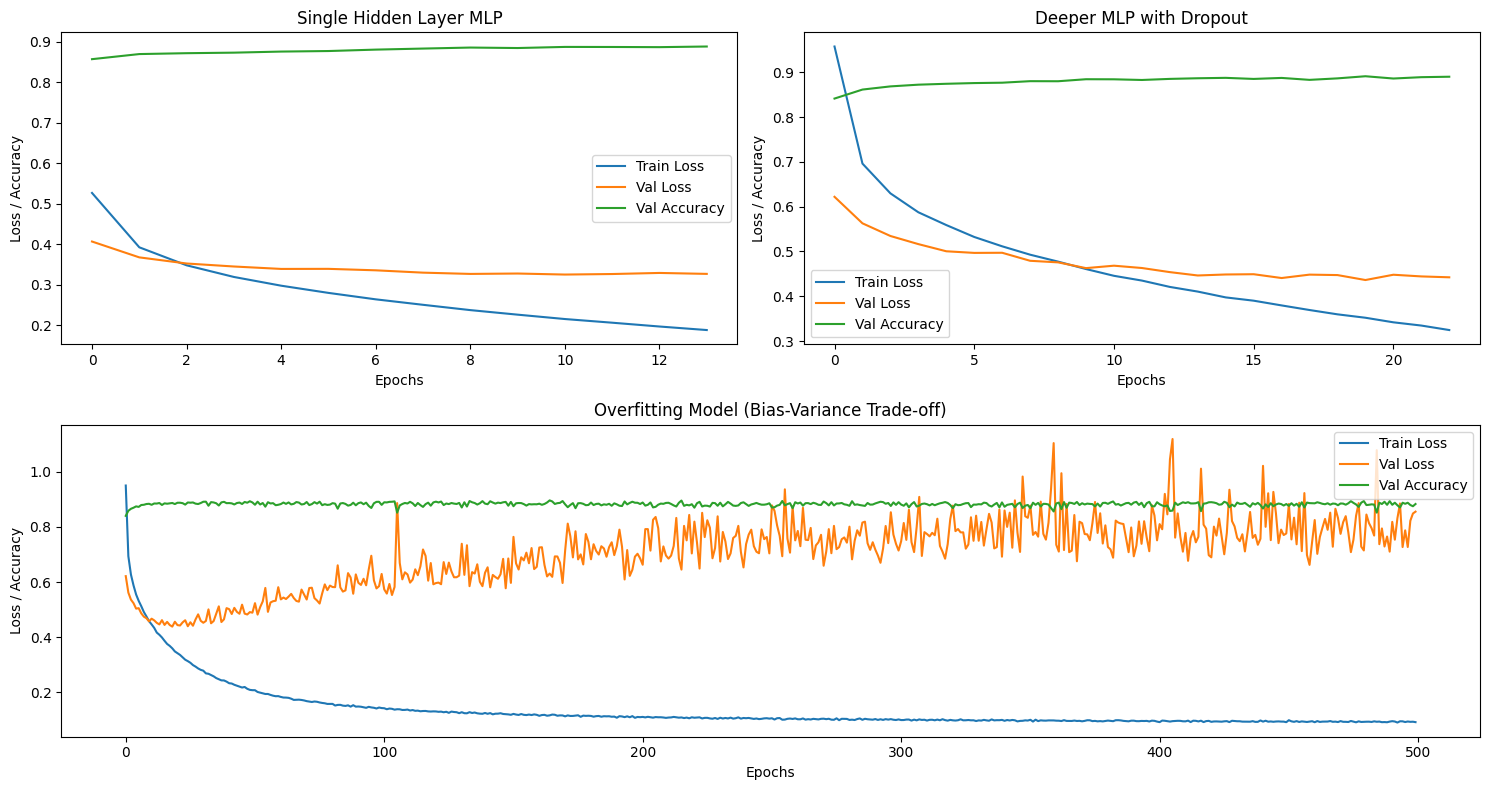

In [22]:
import matplotlib.gridspec as gridspec

# Set up a 2-row, 2-column layout with custom grid
fig = plt.figure(figsize=(15, 8))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

# Plot 1 (Top-left)
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Val Loss')
ax1.plot(history.history['val_accuracy'], label='Val Accuracy')
ax1.set_title('Single Hidden Layer MLP')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss / Accuracy')
ax1.legend()

# Plot 2 (Top-right)
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(history_deeper.history['loss'], label='Train Loss')
ax2.plot(history_deeper.history['val_loss'], label='Val Loss')
ax2.plot(history_deeper.history['val_accuracy'], label='Val Accuracy')
ax2.set_title('Deeper MLP with Dropout')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss / Accuracy')
ax2.legend()

# Plot 3 (Bottom row, spanning both columns)
ax3 = fig.add_subplot(gs[1, :])
ax3.plot(history_deeper_ov.history['loss'], label='Train Loss')
ax3.plot(history_deeper_ov.history['val_loss'], label='Val Loss')
ax3.plot(history_deeper_ov.history['val_accuracy'], label='Val Accuracy')
ax3.set_title('Overfitting Model (Bias-Variance Trade-off)')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Loss / Accuracy')
ax3.legend()

plt.tight_layout()
plt.show()


### Confidence Histograms

In [31]:
def plot_tf_confidence_histogram(model, data, true_labels):
    probs = deep_model_ov.model.predict(data, verbose=0)
    preds = np.argmax(probs, axis=1)
    confidences = np.max(probs, axis=1)
    correct = preds == true_labels

    plt.hist(confidences[correct], bins=20, alpha=0.6, label='Correct', color='green')
    plt.hist(confidences[~correct], bins=20, alpha=0.6, label='Incorrect', color='red')
    plt.xlabel('Confidence (Predicted Probability)')
    plt.ylabel('Count')
    plt.title('Prediction Confidence Histogram')
    plt.legend()
    plt.show()


In [32]:
def get_numpy_from_dataset(dataset):
    """
    Converts a batched tf.data.Dataset into NumPy arrays (X, y).

    Args:
        dataset: tf.data.Dataset with (images, labels) tuples

    Returns:
        X: np.ndarray of images
        y: np.ndarray of labels
    """
    X_list, y_list = [], []

    for images, labels in dataset:
        X_list.append(images.numpy())
        y_list.append(labels.numpy())

    X = np.concatenate(X_list, axis=0)
    y = np.concatenate(y_list, axis=0)

    return X, y


### Expected Calibration Error

In [35]:
def compute_ece_tf(model, X, y_true, n_bins=15):
    probs = model.model.predict(X, verbose=0)
    confidences = np.max(probs, axis=1)
    preds = np.argmax(probs, axis=1)
    accuracies = preds == y_true

    bin_boundaries = np.linspace(0, 1, n_bins + 1)
    ece = 0.0
    for i in range(n_bins):
        bin_lower = bin_boundaries[i]
        bin_upper = bin_boundaries[i+1]
        mask = (confidences > bin_lower) & (confidences <= bin_upper)
        if np.any(mask):
            bin_acc = np.mean(accuracies[mask])
            bin_conf = np.mean(confidences[mask])
            ece += np.abs(bin_acc - bin_conf) * np.sum(mask) / len(confidences)
    return ece


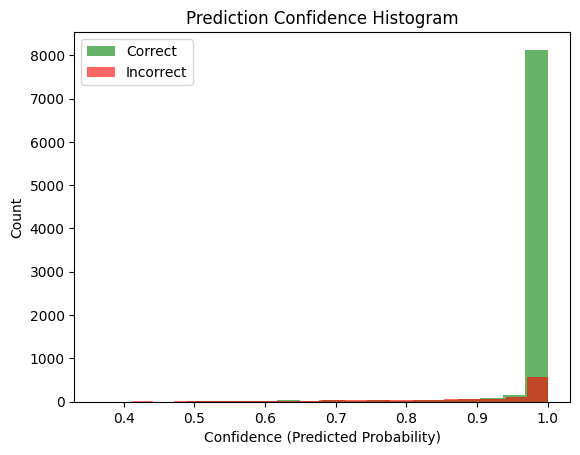

Expected Calibration Error: 0.0954


In [36]:
X_val, y_val = get_numpy_from_dataset(test_ds)

plot_tf_confidence_histogram(deep_model_ov, X_val, y_val)

ece = compute_ece_tf(deep_model_ov, X_val, y_val)
print(f"Expected Calibration Error: {ece:.4f}")

For the confidence histogram, the confidence of each prediction is calculated (the highest softmax score), then ploted for correct and incorrect predictions. Ideally the correct predictions should be around 1.0 (high confidence) and the incorrect predictions should have lower confidence values. 

In the case of overfit models, incorrect predictions also show high confidence, indicating poor calibration.

The ECE quantifies the calibration error by measuring the weighted average of the difference between accuracy and confidence. The closer to 0.1 ECE indicates a relatively high mismatch between confidence and accuracy.

In [37]:
def plot_tf_misclassified_images(model, X, y_true, class_names, max_images=10):
    probs = model.predict(X, verbose=0)
    preds = np.argmax(probs, axis=1)
    incorrect = np.where(preds != y_true)[0]

    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(incorrect[:max_images]):
        plt.subplot(1, max_images, i + 1)
        img = X[idx]
        if img.shape[-1] == 1:  # Grayscale
            img = np.squeeze(img, axis=-1)
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(img)
        plt.title(f'True: {class_names[y_true[idx]]}\nPred: {class_names[preds[idx]]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


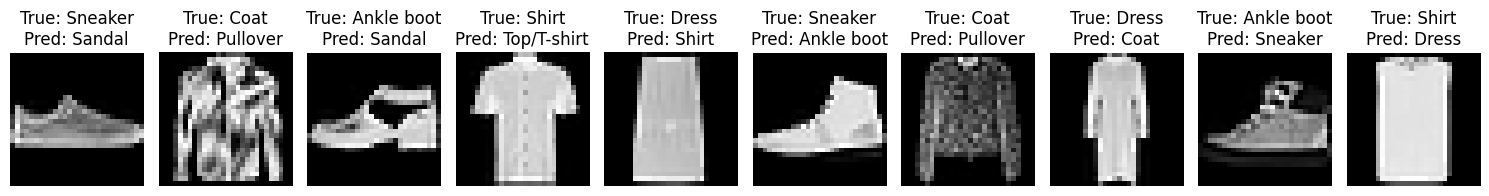

In [38]:
class_names = ['Top/T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot misclassified images
plot_tf_misclassified_images(deep_model_ov.model, X_val, y_val, class_names, max_images=10)


## Testing on  CIFAR-10 dataset

In [ ]:
# Get input shape dynamically from dataset
for X, y in train_ds_10.take(1):
    input_shape_c = X.shape[1:]  
    print("Input shape:", input_shape_c)


Input shape: (28, 28, 3)


In [ ]:
num_classes = 10

mlp_model_on_c = MLPscratch(input_shape=input_shape_c, num_classes=num_classes, num_hiddens=256, seed_value=seed_value)
mlp_model_on_c.MLP(lr=5e-4)

train_data_c, val_data_c = split_large_dataset(train_ds_10, batch_size=batch_size, total_size=len(c_dataset.train_ds[0]))

history_on_c = mlp_model_on_c.mlp_model.fit(
    train_data_c,
    validation_data=val_data_c,
    epochs=50,
    callbacks=[early_stop]
)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2801 - loss: 1.9866 - val_accuracy: 0.3554 - val_loss: 1.7966
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3793 - loss: 1.7312 - val_accuracy: 0.3918 - val_loss: 1.7345
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4138 - loss: 1.6486 - val_accuracy: 0.3978 - val_loss: 1.7020
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4358 - loss: 1.5975 - val_accuracy: 0.4189 - val_loss: 1.6582
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4495 - loss: 1.5588 - val_accuracy: 0.4271 - val_loss: 1.6365
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4623 - loss: 1.5300 - val_accuracy: 0.4362 - val_loss: 1.6136
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4725 - loss: 1.5017 - val_accuracy: 0.4357 - val_loss: 1.6173
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4793 - loss: 1.4806 - 

In [ ]:
test_loss, test_accuracy = mlp_model_on_c.mlp_model.evaluate(test_ds_10)
print(f"Test Accuracy with a shallow MLP: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4656 - loss: 1.5307
Test Accuracy with a shallow MLP: 45.94%


### Using deeper MLP on CIFAR

In [ ]:
checkpoint_c = tf.keras.callbacks.ModelCheckpoint(
    'saved_models/best_cifar10.keras', monitor='val_loss', save_best_only=True
)

Abandoning early-stoping for deeper MLP.

In [ ]:
from utils.dying_neuron_test import DyingNeuronMonitor

# Instantiate your model
deep_model_on_c = MLPscratch(input_shape=input_shape_c, num_classes=num_classes, seed_value=seed_value)
deep_model_on_c.deeperMLP(lr=1e-3, num_hidden1=1024, num_hidden2=512, num_hidden3=256, dropout_rate1=0.3, dropout_rate2=0.4, dropout_rate3=0.5, slope=0.09)

# Prepare the dying neuron monitor callback
monitor = DyingNeuronMonitor(data=val_data_c, threshold=0.99) #look for neurons that are inactive 99% of the time

# Train with both early stopping and dying neuron monitoring
history_deeper_on_c = deep_model_on_c.model.fit(
    train_data_c.repeat(),  # ensure no data exhaustion
    validation_data=val_data_c.repeat(),
    epochs=100,
    callbacks=[reduce_lr, checkpoint], #add monitor to check for dying neurons using relu activation
    steps_per_epoch=1500,   # len(train data)//batch size
    validation_steps=375   # len(val data)//batch size
)


Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.2871 - loss: 2.4443 - val_accuracy: 0.3587 - val_loss: 2.0990 - learning_rate: 0.0010
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.4026 - loss: 1.9768 - val_accuracy: 0.3293 - val_loss: 2.2231 - learning_rate: 0.0010
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.4216 - loss: 1.8918 - val_accuracy: 0.3567 - val_loss: 2.1471 - learning_rate: 0.0010
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.4318 - loss: 1.8641 - val_accuracy: 0.3909 - val_loss: 1.9877 - learning_rate: 0.0010
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.4323 - loss: 1.8569 - val_accuracy: 0.3267 - val_loss: 2.1631 - learning_rate: 0.0010
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.4439 - loss: 1.8255 - val_accuracy: 0.3385 - val_loss: 2.0652 - learning_rate: 0.0010
Epoch 7/100
1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - 

In [ ]:
test_loss_d, test_accuracy_d = deep_model_on_c.model.evaluate(test_ds_10)
print(f"Test Accuracy with a deeper MLP: {test_accuracy_d * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5861 - loss: 1.4221
Test Accuracy with a deeper MLP: 57.82%


An accuracy around 50% indicates that the model is not learning and may be underfit. Even increasing the model complexity is not showing significant improvement. The training loss decreases very slowly.

When a model underfits, increasing the capacity often helps. This is done by either increasing the depth (the number of hidden layers) or by increasing the number of hidden units in a layer. But this does not significantly improve the performance on CIFAR data.

## Plotting the training

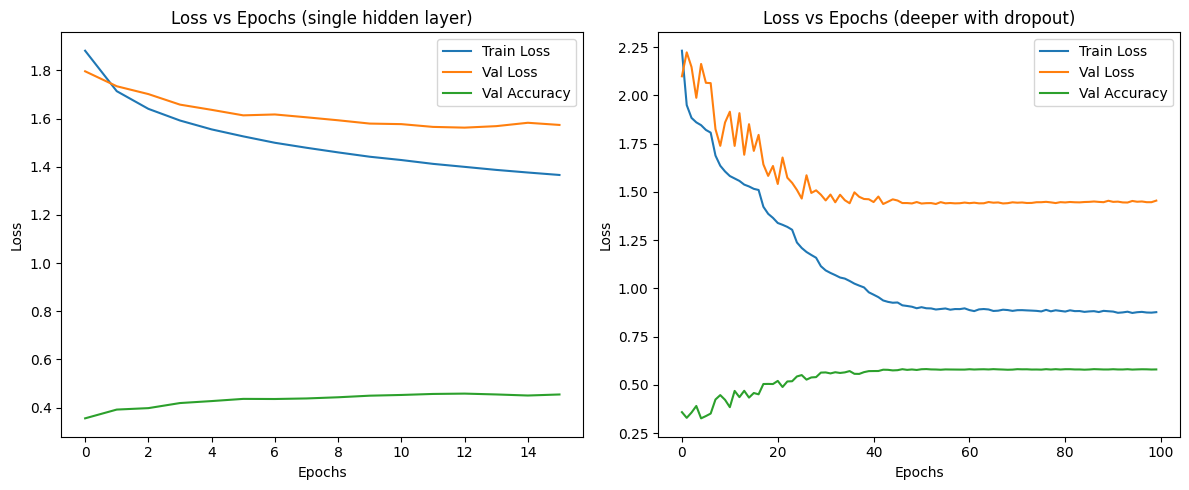

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot 1: Trained with single hidden layer MLP
axes[0].plot(history_on_c.history['loss'], label='Train Loss')
axes[0].plot(history_on_c.history['val_loss'], label='Val Loss')
axes[0].plot(history_on_c.history['val_accuracy'], label='Val Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss vs Epochs (single hidden layer)')
axes[0].legend()

# Plot 2: Deeper MLP with dropout
axes[1].plot(history_deeper_on_c.history['loss'], label='Train Loss')
axes[1].plot(history_deeper_on_c.history['val_loss'], label='Val Loss')
axes[1].plot(history_deeper_on_c.history['val_accuracy'], label='Val Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].set_title('Loss vs Epochs (deeper with dropout)')
axes[1].legend()

plt.tight_layout()  # Auto-adjust spacing between plots
plt.show()


The training plot for the deeper MLP appears noisy and loss plateus quickly. A more complex architecture like CNN is needed for classification on CIFAR dataset.

### Counting trainable model parameters for the shallow and deeper MLP

In [ ]:
def count_keras_params(model):
    return np.sum([np.prod(v.shape) for v in model.trainable_weights])

In [ ]:
shallow_model = count_keras_params(mlp_model_on_c.mlp_model)
deeper_model = count_keras_params(deep_model_on_c.model)

print(f"The shallow MLP model has {shallow_model} trainable params.")
print(f"and, The deeper MLP model has {deeper_model} trainable params.")

The shallow MLP model has 604938 trainable params.
and, The deeper MLP model has 3071754 trainable params.
